# Opinião de usuários de twitter sobre empresas americanas de aviação

Este caderno contêm o trabalho dos alunos Henrique Hideki, Lucas Nascimento e Mauro Floriano, estudantes do curso
de Engenharia de Computação da instituição CEFET-MG, para a matéria de Aprendizado de Máquina lecionado pelo 
professor Daniel Hasan Dalip. 

O trabalho será baseado em um dataset público disponibilizado no site: 
[figure eight](https://www.figure-eight.com/data-for-everyone/).
    
Este dataset contêm textos inscritos por usuários da rede social Twitter, os chamados tweets, durante o ano de
2015 sobre algumas das principais empresas americanas de aviação. Nele possuimos diversas informações como o próprio texto que contêm a opinião ou comentário do usuário sobre entre outros dados como pode ser visto abaixo:

In [1]:
from airlines_analysis.analysis import Analysis
from airlines_analysis.enums import SentimentEnum

analysis = Analysis()
analysis.df

/Users/r13/.virtualenvs/ml/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/r13/.virtualenvs/ml/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to /Users/r13/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,681679794,False,finalized,3,2/25/15 19:46,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/15 12:01,5.695880e+17,NaN,NaN
14636,681679795,False,finalized,3,2/25/15 19:14,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/15 11:59,5.695870e+17,Texas,NaN
14637,681679796,False,finalized,3,2/25/15 19:04,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/15 11:59,5.695870e+17,"Nigeria,lagos",NaN
14638,681679797,False,finalized,3,2/25/15 18:59,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/15 11:59,5.695870e+17,New Jersey,Eastern Time (US & Canada)


## Contextualização e Motivação 

Com os dados disponibilizados nesse dataset, podemos fazer diversos estudos e análises, como saber das opiniões positivas e negativas de cada empresa, quais são os pontos que são mais falados, também podemos interpertar o texto de maneira a tentar entender se aquele comentário é positivo, negativo ou neutro.

Essa parte da inteligência artifical que tenta entender a opinião expressa em um texto de maneira a caracterizar o texto como neutro, positivo ou negativo é chamado de análise de sentimento. Essa área tem ganhado cada vez mais visibilidade, com o crescente número de dados disponibilizados pelo mundo. 

## Análise dos Dados e Pré-processamento

Como é possível verificar acima, os dados iniciais do dataset disponibilizado contêm diversas informações. Para a parte de análise de sentimento utilizaremo apenas duas colunas, text, que contêm o texto do tweet de cada usuário e a coluna airline_sentiment, que contêm o sentimento daquele texto já mapeado.

Apesar de utilizar apenas essas duas colunas para essa parte do trabalho, ao analisarmos algumas outras colunas, conseguimos tirar algumas conclusões válidas para o desenvolvimento, uma das colunas que tem dados importantes é a airline_sentiment:confidence, nela nos é informado a confiança do sentimento previamente analisado. Vamos analisar um pouco os dados dessa coluna abaixo: 

In [2]:
df_confindence_low = analysis.df[analysis.df["airline_sentiment:confidence"] < 0.60]

df_confindence_low.size

4760

Como é possível concluir, existem 4760 registros com uma confiabilidade menor que 60%, para nosso trabalho iremos remover esses registros para tentar tornar nosso algoritmo mais confíavel. o novo dataframe poderá ser visto a seguir

In [3]:
confident_df = analysis.remove_unconfident_sentiment(analysis.df)

confident_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
5,681448162,False,finalized,3,2/25/15 9:10,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)



Com o novo dataset, apenas com os dados que utilizaremos no trabalho, vamos agora para trabalhar um pouco na limpeza do texto dos tweets, uma prática muito comum para esse tipo de dado, como é possível analisar na tese de [Nadia Felix Felipe da Silva](https://www.teses.usp.br/teses/disponiveis/55/55134/tde-27092016-143947/publico/NadiaFelixFelipedaSilva_Revisada.pdf).

Para esse estudos iremos remover as menções, os links para sites e tags e caracteres web indesejados, com o auxilio da biblioteca chamada [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc).

In [4]:
web_cleaned_df = analysis.remove_html_and_tweet_tags(confident_df)
web_cleaned_df[['text', 'text_final']].head()

,text,text_final
0,@VirginAmerica What @dhepburn said.,What said.
2,@VirginAmerica I didn't today... Must mean I n...,I didn't today... Must mean I need to take an...
3,@VirginAmerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""en..."
4,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay $30 a flight for seats th...


Depois de limpar o texto e criar uma nova coluna para o mesmo alterado. Iremos colocar valor para o sentimento, alterando de neutro, negativo e positivo para 0, 1, 2 respectivamente.

In [5]:
df_work = analysis.convert_sentiment_to_scalar(web_cleaned_df)
df_work[['airline_sentiment', 'sentiment']]

,airline_sentiment,sentiment
0,neutral,0
2,neutral,0
3,negative,1
4,negative,1
5,negative,1
...,...,...
14634,negative,1
14636,negative,1
14637,neutral,0
14638,negative,1


Na tentantiva de melhorar a análise de sentimento dos textos, foi removido do texto as palavras que são consideradas irrelevante, chamada de stopwords.

In [6]:
df_work = analysis.remove_stopwords(df_work)
df_work[['text_final']].head()

,text_final
0,What said.
2,today... Must mean need take another trip!
3,"really aggressive blast obnoxious ""entertainme..."
4,really big bad thing
5,seriously would pay $30 flight seats playing. ...


Após finalizar as alterações no dado, vamos criar nosso dataframe que vamos utilizar para o algoritmo, com os dados que modificamos nas etapas anteriores.

In [7]:
df_work = df_work.loc[:, ['text_final', 'sentiment']]

df_work.head()

,text_final,sentiment
0,What said.,0
2,today... Must mean need take another trip!,0
3,"really aggressive blast obnoxious ""entertainme...",1
4,really big bad thing,1
5,seriously would pay $30 flight seats playing. ...,1


# Treinamento

Após todo o processamento dos dados, vamos separar o dataframe em duas partes, a parte para treino e a parte para teste, a serapação será feita da seguinte forma, 80% do dataframe será para treino e 20% para teste, essa é uma proporção comum para algoritmos de machine learning.

In [8]:
results = analysis.train(df_work)
confusion_matrix = analysis.get_confusion_matrix(results)
metrics_by_class = analysis.metrics_by_class(results)
average_metrics = analysis.average_metrics(results)

# Resultados

Os treinamentos foram executados utilizando três algoritmos, [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree), [Bernoulli Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Bernoulli_naive_Bayes) e [SVM](https://en.wikipedia.org/wiki/Support-vector_machine).

Porém ao utilizar o SVM não foi possivel obter nenhum resultado em um intervalo de 30 min para fins de perfomance foi removido desse notebook.

## Matriz de Confusão - Decision Tree

In [9]:
confusion_matrix['DecisionTreeClassifier']

,neutro,negativo,positivo
neutro,253,286,61
negativo,229,1487,108
positivo,48,124,285


## Matriz de Confusão - Bernoulli Naive Bayes

In [10]:
confusion_matrix['BernoulliNB']

,neutro,negativo,positivo
neutro,222,353,25
negativo,40,1772,12
positivo,30,197,230


## Resultado por classe - Decision Tree

In [11]:
metrics_by_class['DecisionTreeClassifier']

,neutro,negativo,positivo
Precisão,0.477358,0.783869,0.627753
Recall,0.421667,0.815241,0.623632
F Score,0.447788,0.799248,0.625686
Quantidade,600.000000,1824.000000,457.000000


## Resultado por classe - Bernoulli Naive Bayes

In [12]:
metrics_by_class['BernoulliNB']

,neutro,negativo,positivo
Precisão,0.760274,0.763135,0.861423
Recall,0.370000,0.971491,0.503282
F Score,0.497758,0.854800,0.635359
Quantidade,600.000000,1824.000000,457.000000


## Resultados Gerais

In [13]:
average_metrics

,DecisionTreeClassifier,BernoulliNB
Acurácia,0.702881,0.771954
Precisão,0.629660,0.794944
Recall,0.620180,0.614925
F Score,0.624240,0.662639
Quantidade,NaN,NaN


## Análise dos Resultados

Com base nos resultados obtidos nos dois modelos de treinamento, foi possível observar na matriz de confusão que
devido a grande quantidade de comentários negativos a classe com maior taxa de acerto na predição foi a classe de
negativos.

Essa análise da matriz de confusão se reflete ao observar os resultados por classse dos algortimos, em que a predição de tweets negativos chega a valores bem altos nos dois algoritmos.

Com base em todos os resultados, pode-se observar uma taxa de acerto mais elevada no algorimo Bernoulli Naive Bayes.



## Possível melhoria

Com os resultados obtidos, percebemos que o sentimento neutro de acordo com o dataset disponibilizado não nos trouxe uma precisão no resultado tão satisfatoria como o sentimento negativo e positivo. Além disso no nosso cenário, iremos dar um foco na análise nos sentimentos negativos para a partir deles traçar possíveis melhorias no serviço das companhias aérias.

Logo iremos realizar uma nova análise com o os resultados positivos e neutros juntos para vermos se essa mudança nos gera uma melhoria nos resultados

In [14]:
analysis_new = Analysis()
confident_df_new = analysis_new.remove_unconfident_sentiment(analysis.df)
web_cleaned_df_new = analysis_new.remove_html_and_tweet_tags(confident_df_new)
df_work_new = analysis_new.convert_sentiment_to_scalar_neutral_is_positive(web_cleaned_df_new)
df_work_new = analysis_new.remove_stopwords(df_work_new)


[nltk_data] Downloading package stopwords to /Users/r13/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Agora que fizemos os mesmo processamentos com os dados porém juntando neutros e positivos, iremos fazer a análise para vermos o resultado final.

In [15]:
results_new = analysis_new.train(df_work_new)
confusion_matrix_new = analysis_new.get_confusion_matrix_neutral_is_positive(results_new)
metrics_by_class_new = analysis_new.metrics_by_class_neutral_is_positive(results_new)
average_metrics_new = analysis_new.average_metrics(results_new)

In [16]:
confusion_matrix_new['DecisionTreeClassifier']

,positivo,negativo
positivo,721,336
negativo,338,1486


In [17]:
confusion_matrix_new['BernoulliNB']

,positivo,negativo
positivo,750,307
negativo,144,1680


In [18]:
metrics_by_class_new['DecisionTreeClassifier']

,positivo,negativo
Precisão,0.680831,0.815587
Recall,0.682119,0.814693
F Score,0.681474,0.815140
Quantidade,1057.000000,1824.000000


In [19]:
metrics_by_class_new['BernoulliNB']

,positivo,negativo
Precisão,0.838926,0.845496
Recall,0.709555,0.921053
F Score,0.768836,0.881658
Quantidade,1057.000000,1824.000000


In [20]:
average_metrics_new

,DecisionTreeClassifier,BernoulliNB
Acurácia,0.766053,0.843457
Precisão,0.748209,0.842211
Recall,0.748406,0.815304
F Score,0.748307,0.825247
Quantidade,NaN,NaN


## Análise do conteúdo processado 

Após a realização dos processamentos, iremos agora analisar o conteúdo do resultado, tentando extrair informações 
válidas do mesmo.

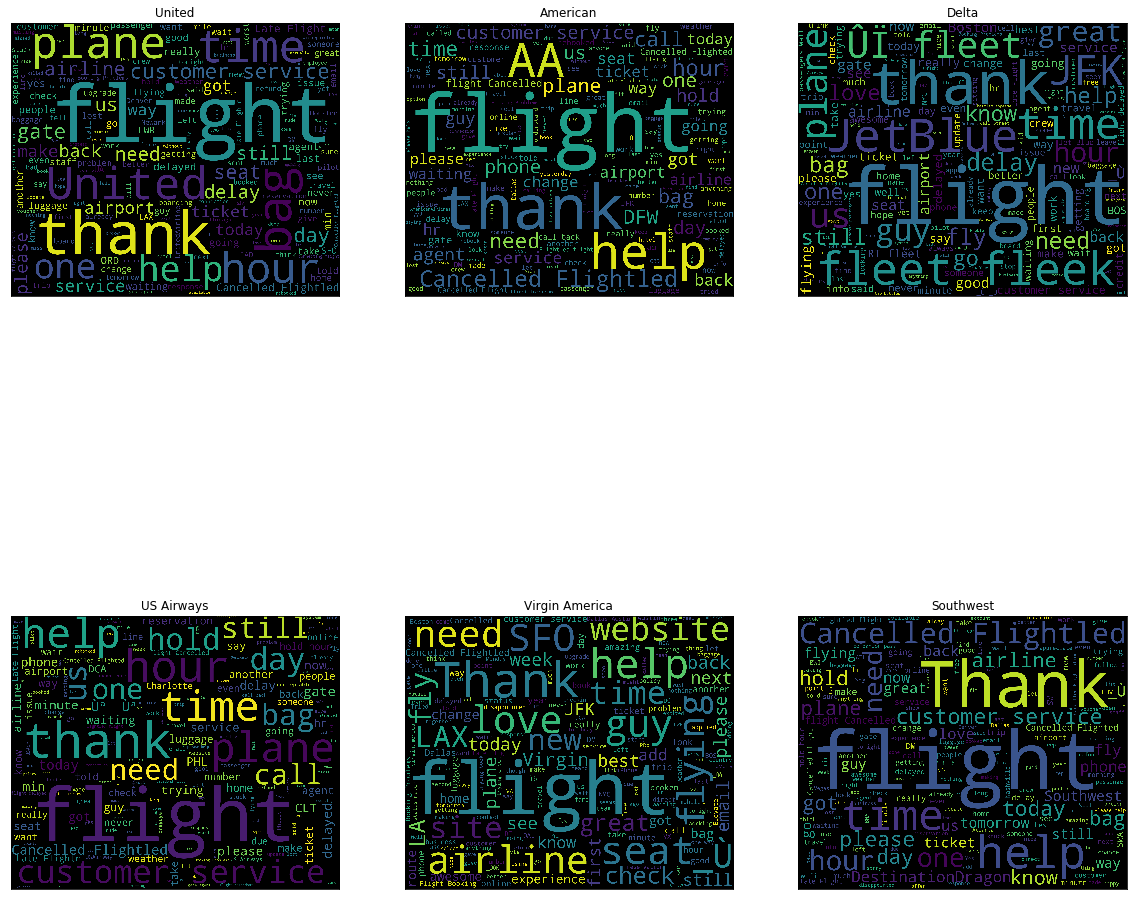

In [21]:
analysis_new.word_cloud_results(df_work_new)

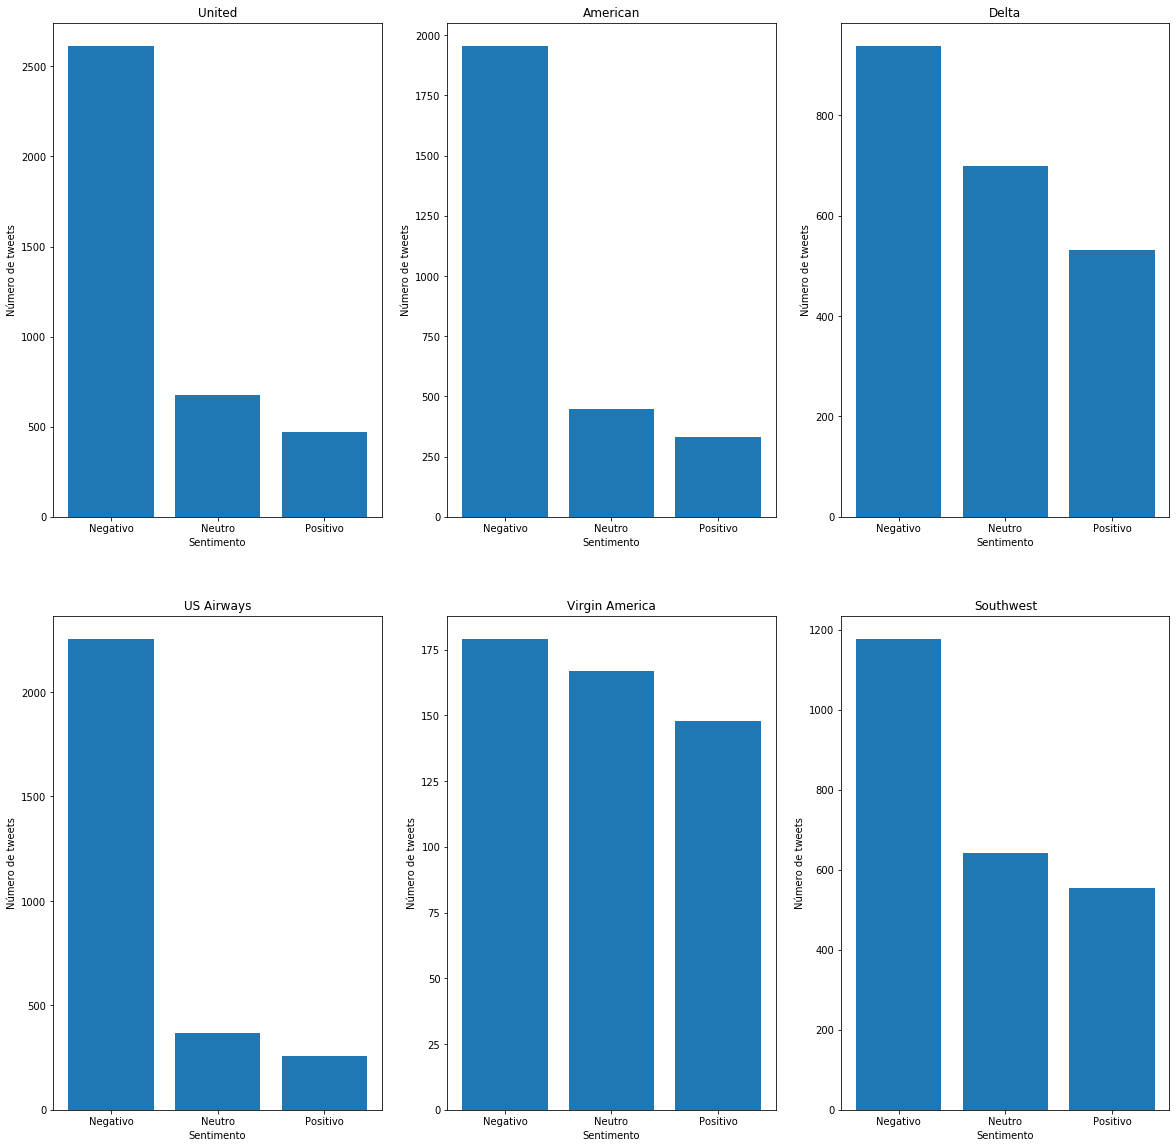

In [22]:
analysis_new.sentiment_results(df_work_new)